In [1]:
# Fill in your name using the format below and student ID number
your_name = "Tomilin, Tristan"
student_id = "1492691"

In [2]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [3]:
# Uncomment the following line to run in Google Colab
# !pip install --quiet openml 

In [4]:
# Uncomment the following line to run in Google Colab
# %tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

c:\users\trist\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\trist\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\trist\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\trist\appd

[]

In [5]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Tensorflow is outdated. This is version 1.14.0. Please update to 2.1.


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [7]:
# base_dir = '/content/drive/My Drive/TestAssignment' # For Google Colab
# base_dir = '/content/drive/My Drive/assignment-3-rtg800'
base_dir = './'

In [8]:
#Uncomment to link Colab notebook to Google Drive
# from google.colab import drive
# drive.mount('/content/drive/')

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [9]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
# import os
# oml.config.cache_directory = os.path.expanduser('/content/cache')

In [10]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [11]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [12]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

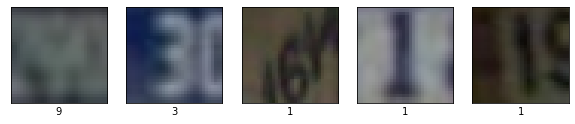

In [13]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [14]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense, Dropout
from tensorflow.keras.activations import relu, softmax, sigmoid
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.losses import categorical_crossentropy

target_shape = 3072
def build_model_1_1():
  model_1_1 = Sequential()
  model_1_1.add(Reshape((target_shape,), input_shape = (32, 32, 3)))
  model_1_1.add(Dense(512, activation = relu))
  model_1_1.add(Dense(256, activation = relu))
  model_1_1.add(Dense(128, activation = relu))
  model_1_1.add(Dense(64, activation = relu))
  model_1_1.add(Dense(32, activation = relu))
  model_1_1.add(Dense(10, activation = softmax))
  model_1_1.compile(optimizer = SGD(), loss = categorical_crossentropy, metrics=['accuracy'])
  return model_1_1

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 3

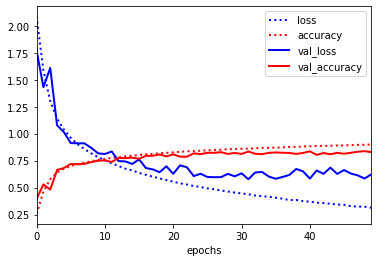

In [16]:
run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, train = False, epochs = 50, batch_size = 32)
answer_q_1_1 = """
ReLu is cheap from a computation standpoint, reducing training time. It performs equally well with sigmoid or tanh, thus it was chosen.
Among the other experimented optimizers (Adam, Adagrad, Adadelta, RMSProp), SGD with a default learning rate of 0.01 performed the best.
For a model consisting of only Dense layers, classifying non-preprocessed poor quality images, it is doing fairly well. 
There is slight overfitting, which is to be expected with no regularization.
"""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [17]:
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

In [18]:
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

def build_model_1_2():
  model_1_2 = Sequential()
  model_1_2.add(Reshape((target_shape // 3,), input_shape = (32, 32, 1)))
  model_1_2.add(Dense(512, activation = relu))
  model_1_2.add(Dense(256, activation = relu))
  model_1_2.add(Dense(128, activation = relu))
  model_1_2.add(Dense(64, activation = relu))
  model_1_2.add(Dense(32, activation = relu))
  model_1_2.add(Dense(10, activation = softmax))
  model_1_2.compile(optimizer = SGD(), loss = categorical_crossentropy, metrics=['accuracy'])
  return model_1_2

Loading model from file
Success!
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_29 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_30 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_32 (Dense)     

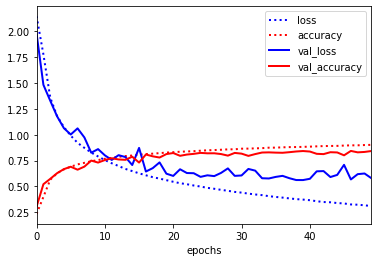

In [19]:
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, train = False, epochs = 50, batch_size = 32)
answer_q_1_2 = """
Since color carries no significant importance in differentiating numbers from one another, 
making the images grayscale, removes substantial unnecessary noise from the data.
Having RGB values, some filters in the model shall activate to colors, which lead to mispredictions.
The model now has a slightly higher accuracy for both training and validation, although is still overfitting.
"""
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

In [20]:
from tensorflow.keras.regularizers import l1, l2

epochs = 50
learning_rate = 1e-2
decay_rate = learning_rate / epochs

def build_model_1_3():
  model_1_3 = Sequential()
  model_1_3.add(Reshape((target_shape // 3,), input_shape = (32, 32, 1)))
  model_1_3.add(Dense(512, activation = relu))
  model_1_3.add(Dense(512, activation = relu))
  model_1_3.add(Dropout(0.2))
  model_1_3.add(Dense(256, activation = relu))
  model_1_3.add(Dense(256, activation = relu))
  model_1_3.add(Dropout(0.2))
  model_1_3.add(Dense(128, activation = relu))
  model_1_3.add(Dropout(0.3))
  model_1_3.add(Dense(64, activation = relu))
  model_1_3.add(Dropout(0.4))
  model_1_3.add(Dense(32, activation = relu))
  model_1_3.add(Dense(10, activation = softmax))
  model_1_3.compile(optimizer = SGD(learning_rate = learning_rate, momentum = 0.9, decay = decay_rate, nesterov = True),
                loss = categorical_crossentropy,
                metrics=['accuracy'])
  return model_1_3

Loading model from file
Success!
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)  

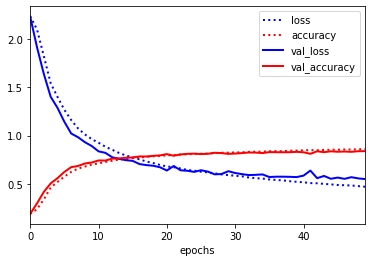

In [21]:
run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, train = False, epochs = epochs, batch_size = 32)
answer_q_1_3 = """
Dropout sets a random selection of inputs units to 0, thus reducing overfitting.
The rate of Dropout gradually increases, since deeper layers need more regularization.

Nesterov Momentum boosts the gradient vectors in the correct direction, thus we get faster convergence.
A decaying learning rate and Nesterov constrain the descent and mitigate overshooting.

Kernel/bias regularizers for Dense layers constrained the model too much.
The model is now barely overfitting.
"""
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

In [22]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten

def build_model_2_1():
  model_2_1 = Sequential()
  model_2_1.add(Conv2D(32, (9, 9), activation = relu, padding = 'same', input_shape = (32, 32, 1)))
  model_2_1.add(BatchNormalization())
  model_2_1.add(Conv2D(32, (9, 9), activation = relu, padding = 'same'))
  model_2_1.add(BatchNormalization())
  model_2_1.add(MaxPool2D((2, 2), padding = 'same'))
  model_2_1.add(Dropout(0.2))

  model_2_1.add(Conv2D(64, (7, 7), activation = relu, padding = 'same'))
  model_2_1.add(BatchNormalization())
  model_2_1.add(Conv2D(64, (7, 7), activation = relu, padding = 'same'))
  model_2_1.add(BatchNormalization())
  model_2_1.add(MaxPool2D((2, 2), padding = 'same'))
  model_2_1.add(Dropout(0.3))

  model_2_1.add(Conv2D(128, (5, 5), activation = relu, padding = 'same'))
  model_2_1.add(BatchNormalization())
  model_2_1.add(Conv2D(128, (5, 5), activation = relu, padding = 'same'))
  model_2_1.add(BatchNormalization())
  model_2_1.add(MaxPool2D((2, 2), padding = 'same'))
  model_2_1.add(Dropout(0.4))

  model_2_1.add(Conv2D(256, (3, 3), activation = relu, padding = 'same'))
  model_2_1.add(BatchNormalization())
  model_2_1.add(Conv2D(256, (3, 3), activation = relu, padding = 'same'))
  model_2_1.add(BatchNormalization())
  model_2_1.add(MaxPool2D((2, 2), padding = 'same'))
  model_2_1.add(Dropout(0.5))

  model_2_1.add(Flatten())
  model_2_1.add(Dense(256, activation = relu))
  model_2_1.add(BatchNormalization())
  model_2_1.add(Dense(128, activation = relu))
  model_2_1.add(Dense(10, activation = softmax))
  model_2_1.compile(optimizer = Adam(),
                loss = categorical_crossentropy,
                metrics=['accuracy'])
  return model_2_1

Loading model from file
Success!
Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_131 (Conv2D)          (None, 32, 32, 32)        2624      
_________________________________________________________________
batch_normalization_137 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 32, 32, 32)        82976     
_________________________________________________________________
batch_normalization_138 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_220 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_133 (Conv2D) 

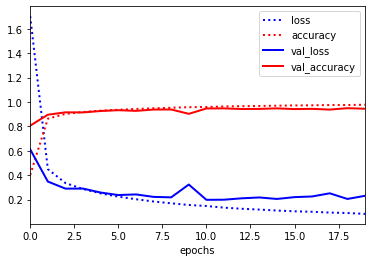

In [23]:
run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, train = False, epochs = 50, batch_size = 32)
answer_q_2_1 = """
The model is constructed of abstract convolutional layer blocks. 
For every deeper block in the network, the filters increase in numbers, but decrease in size.
Zero-padding for Conv2D layers help convey information in the edges.

Batch normalization layers after every Conv2D layer scale and adjust the activations.
The model can thus pick up less noticable features, providing better generalization.
This also reduces overfitting, since some noise is added to the activations.

Max-Pooling is applied at the end of every block to fasten the spread of information across the network and reduce overfitting.
The stride length is kept low, since the images are already very low resolution.

The model is performing far better than the previous ones with only Dense hidden layers.
               """
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def get_augmented_split():
    datagen = ImageDataGenerator(
        rotation_range = 10,
        shear_range = 0.3,
        zoom_range = 0.1,
        fill_mode = 'nearest'
    )
    X_train, X_val, y_train, y_val = preprocessed_split
    it_train = datagen.flow(X_train, y_train, batch_size = 128)
    return it_train, X_val, y_val
augmented_split = get_augmented_split()

Loading model from file
Success!
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 32, 32, 32)        2624      
_________________________________________________________________
batch_normalization_72 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 32, 32, 32)        82976     
_________________________________________________________________
batch_normalization_73 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)  

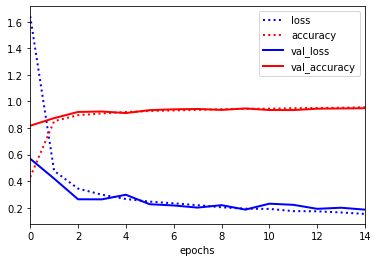

In [25]:
run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, train = False, epochs = 15, batch_size = None, generator = True, steps_per_epoch = 500)
answer_q_2_2 = """
Vertical/horizontal flips drop the accuracy by ~10%, since digits in this dataset are already correctly orintated.
Image flipping leads to mispredictions, since a number might resemble to another.
Random shifts are irrelevant, since digits on the images are already centered.
A conservative degree of shearing, zooming and rotating contribute the most towards achieving a higher accuracy.
Images are taken from different angles and distances, hence those distortions also appear within the data.
"""
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

19858/19858 [==============================] - 218s 11ms/sample - loss: 0.1970 - acc: 0.9475

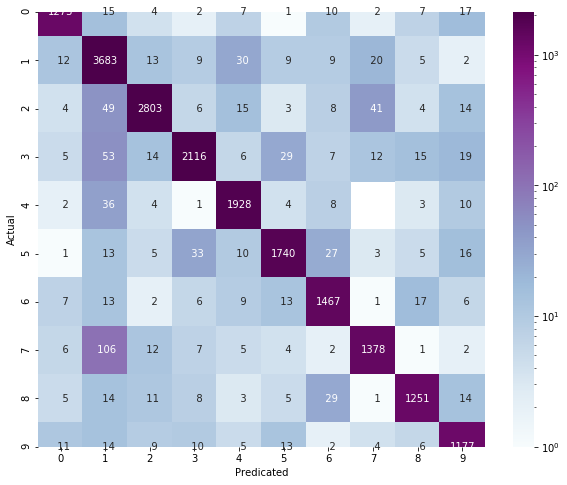

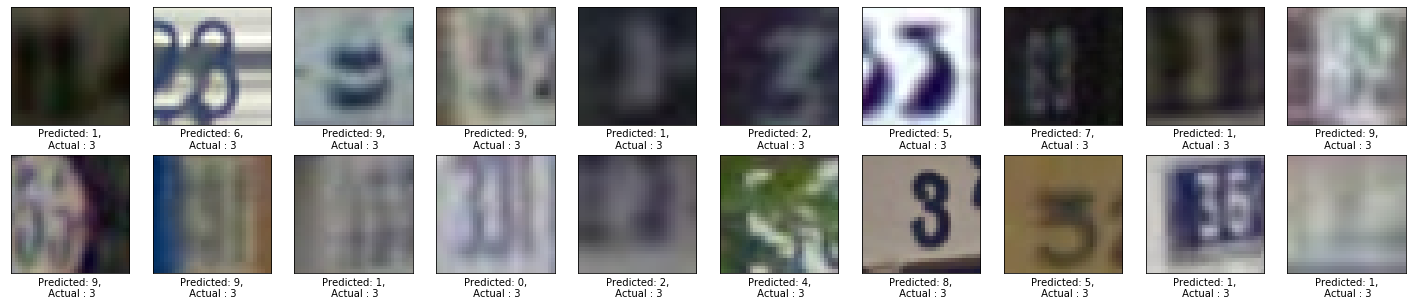

In [26]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LogNorm
import seaborn as sns

def plot_confusion_matrix():
  df_cm = pd.DataFrame(conf_matrix)
  plt.figure(figsize = (10, 8))
  log_norm = LogNorm(vmin = conf_matrix.min().min(), vmax = conf_matrix.max().max())
  sns.heatmap(df_cm, annot = True, fmt = '4d', cmap = 'BuPu', robust = True, norm = log_norm)
  plt.xlabel('Predicated')
  plt.ylabel('Actual')

def plot_row(row, n_samples, axes, misclassified_samples):
  for nr, i in enumerate(np.random.choice(misclassified_samples, n_samples)):
      axes[row][nr].imshow(X_test[i])
      axes[row][nr].set_xlabel("Predicted: %s,\n Actual : %s" % (y_pred[i], y_test_args[i]))
      axes[row][nr].set_xticks(()), axes[row][nr].set_yticks(())

def plot_misclassifications():
  most_misclassified = np.argmax(np.sum(conf_matrix, axis = 1) - np.diagonal(conf_matrix))
  all_misclassified_samples = np.nonzero(y_test_args != y_pred)[0]
  misclassified_samples = all_misclassified_samples[y_test_args[all_misclassified_samples] == most_misclassified]
  pafig, axes = plt.subplots(2, 10,  figsize = (25, 5))
  plot_row(0, 10, axes, misclassified_samples)
  plot_row(1, 10, axes, misclassified_samples)
  plt.show()

X_test_gray = rgb2gray(X_test)
model_2_2 = load_model_from_file(base_dir, 'model_2_2')
test_accuracy_3_1 = model_2_2.evaluate(X_test_gray, y_test)[1]
y_pred = (np.argmax(model_2_2.predict(X_test_gray), axis = 1) + 1) % 10
y_test_args = (np.argmax(y_test, axis = 1) + 1) % 10
conf_matrix = confusion_matrix(y_test_args, y_pred)
plot_confusion_matrix()
plot_misclassifications()

answer_q_3_1 = """
From the confusion matrix, we calculate the label with the most misclassifications, which turns out to be '1'.
This number has least visual characteristics, which makes it harder to learn.
From the plotted misclassifications of '1', we can observe that some images consist of multiple different numbers, 
hence the filters might activate for the wrong number and the model mispredicts.
Some images have such poor quality that makes them incomprehensible even for the human eye.
"""
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

In [27]:
from tensorflow.keras import models

def plot_activations():
  X_train, X_val, y_train, y_val = preprocessed_split
  img_tensor = X_test_gray[0]
  img_tensor = np.expand_dims(img_tensor, axis = 0) 

  model = load_model_from_file(base_dir, 'model_2_2')
  conv2d_layers = [layer for layer in model.layers if 'conv2d' in layer.name and layer.filters <= 64]
  layer_outputs = [layer.output for layer in conv2d_layers]
  activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
  activations = activation_model.predict(img_tensor)

  layer_names = [layer.name for layer in conv2d_layers]
  images_per_row = 16

  for layer_name, layer_activation in zip(layer_names, activations):
      n_features = layer_activation.shape[-1]
      size = layer_activation.shape[1]
      n_cols = n_features // images_per_row
      display_grid = np.zeros((size * n_cols, images_per_row * size))
      for col in range(n_cols):
          for row in range(images_per_row):
              channel_image = layer_activation[0, :, :, col * images_per_row + row]
              channel_image -= channel_image.mean()
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
      scale = 1. / size
      plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
      plt.title("Activation of layer {}".format(layer_name))
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')
  plt.show()

c:\users\trist\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


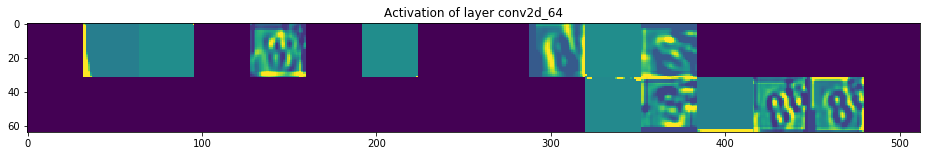

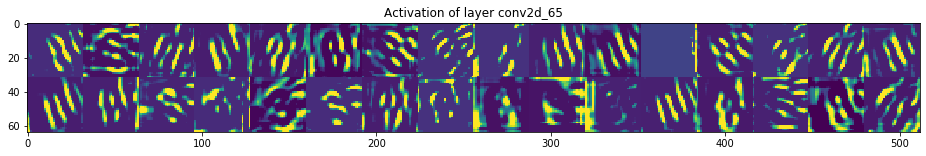

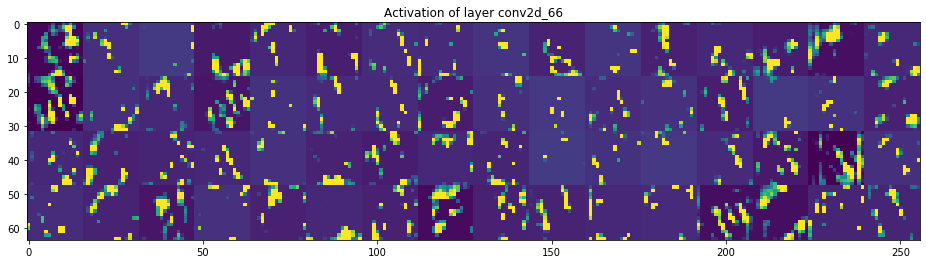

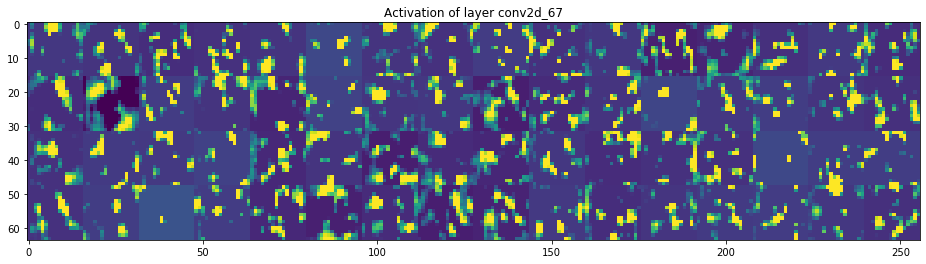

Answer is 479 characters long


In [28]:
plot_activations()

answer_q_3_2 = """
In the first layer of activations most filters remain unactivated, but some manage to detect the numbers.
The second Conv2D layer has squiqqly lines that display the shape of the number '8' really well.
The third and fourth layer provide a higher level of abstraction, lighting up on certain characteristics.
Some filters detect noise in the background rather than the numbers.
Filter activations of deeper layer are too abstract to interpret anything meaningful, thus omitted.
"""
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

In [29]:
from tensorflow.keras import backend as K
import tensorflow as tf

def plot_activation_map():
  K.clear_session()
  img_tensor = X_test_gray[0]
  img_tensor = np.expand_dims(img_tensor, axis = 0) 
  model = load_model_from_file(base_dir, 'model_2_2')
  conv2d_layers = [layer for layer in model.layers if 'conv2d' in layer.name]
  last_conv_layer_output = conv2d_layers[-1].output
  filter_index = 0
  with tf.GradientTape() as tape:
    tape.watch(last_conv_layer_output)
    loss = K.mean(last_conv_layer_output[:, :, :, filter_index])
  grads = tape.gradient(loss, last_conv_layer_output)
  pooled_grads = K.mean(grads, axis = (0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer_output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([img_tensor])
  for i in range(256):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  return np.mean(conv_layer_output_value, axis = -1)

In [30]:
#pip install opencv-python
import cv2

def super_impose():
  resolution = 128
  img = X_test[0]
  img = cv2.resize(img, (resolution, resolution))
  activation_map = plot_activation_map()
  activation_map = cv2.resize(activation_map, (resolution, resolution))
  activation_map = np.maximum(activation_map, 0)
  activation_map /= np.max(activation_map)
  activation_map = np.uint8(activation_map * 255)
  activation_map = cv2.applyColorMap(activation_map, cv2.COLORMAP_JET)
  activation_map = np.float32(activation_map / 255)
  superimposed_img = activation_map * 0.4 + img
  return cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


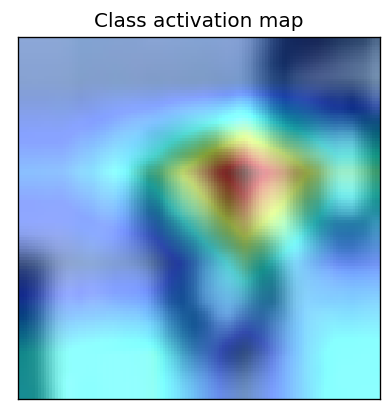

array([[[0.54901963, 0.654902  , 0.8439216 ],
        [0.54901963, 0.654902  , 0.8439216 ],
        [0.54901963, 0.654902  , 0.8439216 ],
        ...,
        [0.29558825, 0.4009804 , 0.54      ],
        [0.30980393, 0.41568628, 0.5537255 ],
        [0.30980393, 0.41568628, 0.5537255 ]],

       [[0.54901963, 0.654902  , 0.8439216 ],
        [0.54901963, 0.654902  , 0.8439216 ],
        [0.54901963, 0.654902  , 0.8439216 ],
        ...,
        [0.29558825, 0.4009804 , 0.54      ],
        [0.30980393, 0.41568628, 0.5537255 ],
        [0.30980393, 0.41568628, 0.5537255 ]],

       [[0.54852945, 0.6544118 , 0.8434314 ],
        [0.54852945, 0.6544118 , 0.8434314 ],
        [0.54852945, 0.6544118 , 0.8434314 ],
        ...,
        [0.30520836, 0.41047797, 0.5495589 ],
        [0.31911767, 0.425     , 0.56303924],
        [0.31911767, 0.425     , 0.56303924]],

       ...,

       [[0.09068628, 0.5535294 , 0.57892156],
        [0.09068628, 0.5535294 , 0.57892156],
        [0.09234069, 0

In [31]:
def plot_3_3():
  image = super_impose()
  plt.rcParams['figure.dpi'] = 120
  plt.imshow(image)
  plt.title('Class activation map')
  plt.xticks([])
  plt.yticks([])
  plt.show()
  return image
plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

In [32]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Input, Model

def build_model_4_1():
  conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))
  model_4_1 = models.Sequential()
  for layer in conv_base.layers:
    layer.trainable = layer.name.startswith('block5_conv')
    model_4_1.add(layer)
  model_4_1.add(Flatten())
  model_4_1.add(Dense(128, activation = relu, kernel_regularizer = l2(0.01), bias_regularizer = l1(0.01)))
  model_4_1.add(BatchNormalization())
  model_4_1.add(Dropout(0.5))
  model_4_1.add(Dense(10, activation = sigmoid))
  model_4_1.compile(optimizer = Adam(lr = 1e-3),
              loss = categorical_crossentropy,
              metrics=['accuracy'])
  model_4_1.summary()
  return model_4_1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)         2

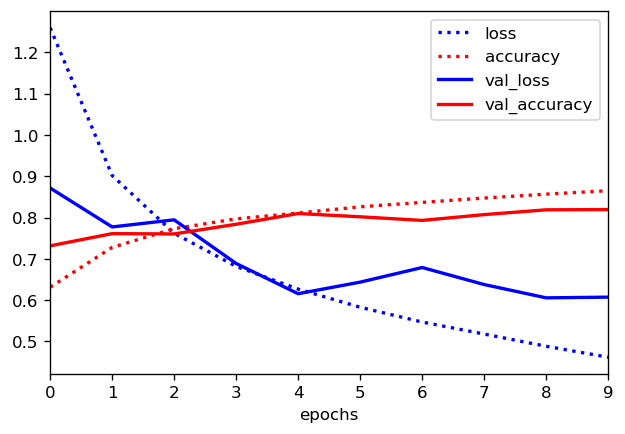

In [33]:
run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, train = False, epochs = 10, batch_size = 32)
answer_q_4_1 = """
The performance is not as good comparing to the self built model_2_2.
Adding multiple Dense layers didn't increase the accuracy.
Retraining the last Conv2D block had a significant improvement for performance, raising the accuracy ~30%.
A certain degree of regularization was necessary to keep the model from drastically overfitting.
"""
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [34]:
import gzip
import pickle
import itertools as it
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.preprocessing import PowerTransformer, Normalizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

In [35]:
def build_pipeline(scaler):
  clf = MLPClassifier(hidden_layer_sizes = (500,), alpha = 0.001, activation = 'relu', solver = 'sgd')
  return make_pipeline(scaler, clf)

def heatmap(columns, rows, scores):
    df = pd.DataFrame(scores, index = rows, columns = columns)
    sns.heatmap(df, cmap = 'RdYlGn_r', linewidths = 0.5, annot = True, fmt = ".3f")

def evaluate_rf(X_train, y_train):
  estimator_param_name = 'randomforestclassifier__n_estimators'
  features_param_name = 'randomforestclassifier__max_features'
  param_grid = {estimator_param_name: np.int_(np.linspace(300, 500, 3)),
                features_param_name: np.linspace(0.2, 0.4, 3)}
  evaluate_classifier(RandomForestClassifier(), X_train, y_train, param_grid, estimator_param_name, features_param_name)

def evaluate_mlp(X_train, y_train):
  solver_param_name = 'mlpclassifier__solver'
  # alpha_param_name = 'mlpclassifier__alpha'
  sizes_param_name = 'mlpclassifier__hidden_layer_sizes'
  param_grid = {solver_param_name: ['lbfgs', 'sgd', 'adam'],
                # alpha_param_name: np.logspace(-2, -4, 3)}
                sizes_param_name: [200, 300, 400]}
  evaluate_classifier(MLPClassifier(alpha = 0.001), X_train, y_train, param_grid, solver_param_name, sizes_param_name)

def evaluate_classifier(clf, X_train, y_train, param_grid, param1_name, param2_name):
  pipeline = build_pipeline(clf)
  grid_search = GridSearchCV(pipeline, param_grid, cv = 3, scoring = 'accuracy')
  grid_search.fit(X_train, y_train)
  scores = grid_search.cv_results_['mean_test_score']
  scores_shaped = scores.reshape(3, 3)
  heatmap(param_grid[param1_name], param_grid[param2_name], scores_shaped)
  return scores

In [36]:
def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  model_4_1 = load_model_from_file(base_dir, 'model_4_1')
  conv_base = Sequential()
  conv_base_layers = model_4_1.layers[:-1]
  for layer in conv_base_layers:
    if layer.name.startswith('flatten'):
      break
    conv_base.add(layer)
  train_embedding = conv_base.predict(X_train)
  test_embedding = conv_base.predict(X_test)
  store_embedding(train_embedding, 'train')
  store_embedding(test_embedding, 'test')

def generate_pipeline():
  clf = MLPClassifier(hidden_layer_sizes = (200,), alpha = 0.001, activation = 'relu', solver = 'sgd')
  return make_pipeline(StandardScaler(), clf)

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  return pipeline.fit(X_train, y_train).score(X_test, y_test)

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3])
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3])

  y_train = np.argmax(y_train, axis = 1)
  y_test = np.argmax(y_test, axis = 1)
  
  # evaluate_rf(X_train, y_train)
  # evaluate_mlp(X_train, y_train)
  # classifiers = {'MLP': MLPClassifier(), 'RandomForest': RandomForestClassifier()}
  # scalers = {'No Scaler': None, 'StandardScaler': StandardScaler(), 'Normalizer': Normalizer(), 'PowerTransformer': PowerTransformer()}
  # scores = [np.mean(cross_val_score(build_pipeline(scaler), X_train, y_train, scoring = "accuracy", cv = 3, n_jobs = -1)) for scaler, clf in it.product(scalers.values(), classifiers.values())]
  # heatmap(classifiers.keys(), scalers.keys(), np.array(scores).reshape(4, 2))

  pipeline = generate_pipeline()
  return evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test)

# store_embeddings()
# X_train_embedded = load_embedding('train')
# X_test_embedded = load_embedding('test')
# evaluation_4_2(X_train_embedded, y_train, X_test_embedded, y_test)

answer_q_4_2 = """
All the sklearn classifiers that support multilabels or multioutput were evaluated. 
The best performing ones were RandomForest and MLP.
For those two, GridSearch was used to determine the best hyperparameters for the models.
The only preprocessing step in the pipeline that improved anything was scaling.
The accuracy of the classifier is as good as the evaluation of model_4_1.
"""
print("Pipeline:", generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Pipeline: Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpclassifier',
                 MLPClassifier(activation='relu', alpha=0.001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(200,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='sgd',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)
Answer is 381 characters long


c:\users\trist\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
